A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [199]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [200]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [201]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [202]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [203]:
twod = PCA(2)
threed = PCA(3)

In [204]:
X_pca = twod.fit_transform(X)

In [205]:
k = 8
inertia_list = []
k_list = []
sil_score = []
for i in range(2,k):
    globals()['kmeans_pca%s' % i] = KMeans(n_clusters= i,random_state= 42 ).fit(X_pca)
    inertia_list.append(globals()['kmeans_pca%s' % i].inertia_)
    sil_score.append(silhouette_score(X_pca, globals()['kmeans_pca%s' % i].labels_))
    k_list.append(i)

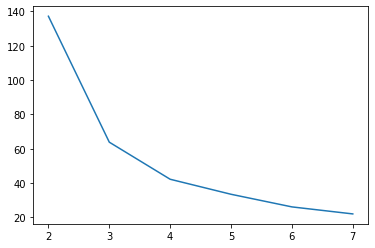

In [206]:
plt.plot(k_list, inertia_list)

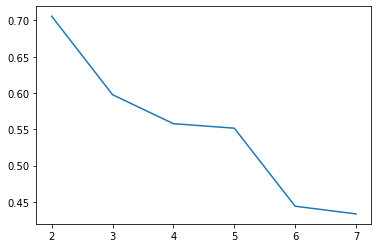

In [207]:
plt.plot(k_list, sil_score)

In [208]:
inertia_list

[137.15530112818416,
 63.81994202200124,
 42.22517564743002,
 33.480235063216476,
 26.12959354919589,
 22.040908240189058]

In [209]:
k_list

[2, 3, 4, 5, 6, 7]

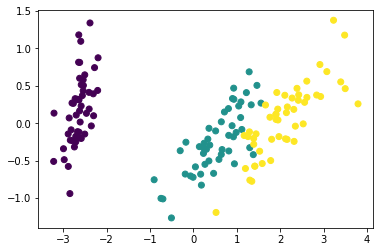

In [210]:
plt.scatter(X_pca[:,0], X_pca[:,1], c= iris.target)

In [211]:
X_pca = twod.transform(X)

In [212]:
kmeans = KMeans(n_clusters=3, random_state= 42 ).fit(X_pca)

In [213]:
y.shape

(150,)

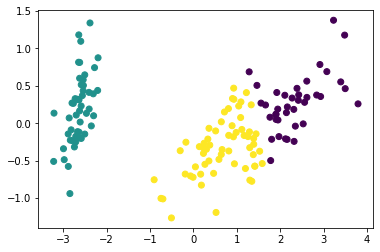

In [214]:
plt.scatter(X_pca[:,0], X_pca[:,1], c= kmeans.labels_)

In [215]:
y_pred = kmeans.predict(X_pca)

In [216]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [217]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [218]:
accuracy_score(y, y_pred)

0.09333333333333334

In [219]:
kmeans.inertia_

63.819942022001264

In [220]:
x_pca3 = threed.fit_transform(X)

In [221]:
k = 8
inertia_list = []
k_list = []
sil_score = []
for i in range(2,k):
    globals()['kmeans_pca%s' % i] = KMeans(n_clusters= i,random_state= 42 ).fit(x_pca3)
    inertia_list.append(globals()['kmeans_pca%s' % i].inertia_)
    sil_score.append(silhouette_score(X_pca, globals()['kmeans_pca%s' % i].labels_))
    k_list.append(i)

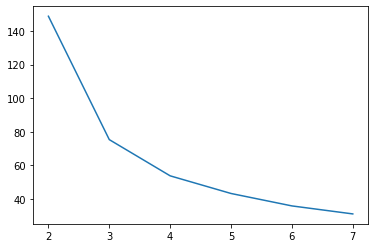

In [222]:
plt.plot(k_list, inertia_list)

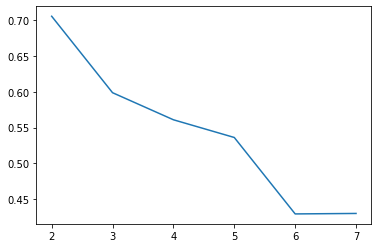

In [223]:
plt.plot(k_list, sil_score)

In [224]:
kmeans = KMeans(n_clusters=3, random_state= 42 ).fit(x_pca3)

In [225]:
kmeans.inertia_

75.31893784137085

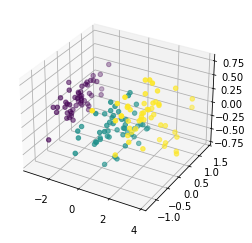

In [226]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca3[:, 0], x_pca3[:, 1], x_pca3[:,2], c=iris.target)
#pyplot.show() 

In [227]:
y_pred = kmeans.predict(x_pca3)

In [228]:
accuracy_score(y, y_pred)

0.24

# Da un mejor resultado con 2 dimensiones

# T-SNE y DBScan

In [230]:
tsne2 = TSNE(2, random_state= 42)

In [231]:
x_tsne = tsne2.fit_transform(X)

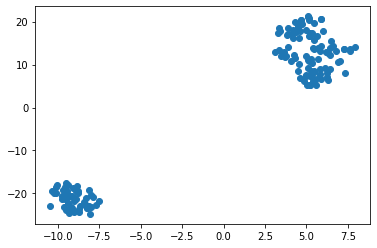

In [232]:
plt.scatter(x_tsne[:,0], x_tsne[:,1])

In [233]:
db = DBSCAN(eps= 1.2, min_samples=5)
db.fit(x_tsne)

DBSCAN(eps=1.2)

In [234]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  2,  2,  1,  1,  2,  2,  2,  2,
        1,  2,  1,  2,  1,  2,  2,  1,  1,  2,  2,  2,  2,  2,  1,  2,  2,
        2,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  2,  1],
      dtype=int64)

In [235]:
y_pred = db.fit_predict(x_tsne)

In [236]:
accuracy_score(y, y_pred)

0.8933333333333333

In [237]:
tsne3 = TSNE(3)

In [238]:
x_tsne = tsne3.fit_transform(X)

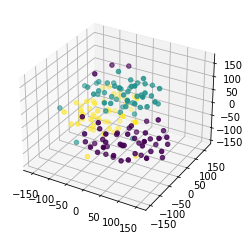

In [239]:
fig = pyplot.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_tsne[:,0], x_tsne[:,1], x_tsne[:,2], c= iris.target)

In [240]:
db = DBSCAN(eps= 80, min_samples=5)
db.fit(x_tsne)

DBSCAN(eps=80)

In [241]:
y_pred = db.fit_predict(x_tsne)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [242]:
accuracy_score(y, y_pred)

0.3333333333333333

# Se ve claramente que en este caso da mejor resultado con TSNE 2